# Simple example of svm code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

[0]
[1]
[ 0.1380943   0.24462418]


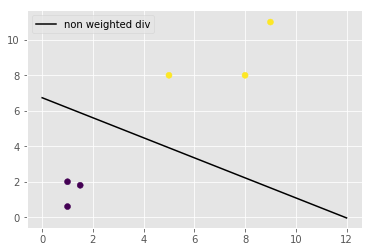

In [5]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = [0,1,0,1,0,1]
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)
print(clf.predict([[0.58,0.76]]))
print(clf.predict([[10.58,10.76]]))
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

# try reading out data on 2 feature 3-class SVM classification

In [71]:
def train_svm_eval(data,labels):
    
    clf = svm.SVC(C = 1.0)
    clf.fit(data,labels)
    y_pred=clf.predict(data)
    return accuracy_score(labels,y_pred)
    
def train_dtree_eval(data,labels):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(data, labels)
    y_pred=clf.predict(data)
    return accuracy_score(labels,y_pred)

def get_data_labels(train_data):
    f=open(train_data,'r').read().split('\n')
    data=[]
    for l in f[1:-1]:
        line=l.split(',')
        this_data=[]
        for i in line[:-1]:
            this_data.append(float(i))
        data.append(this_data)
    
    labels=[l.split(',')[-1] for l in f[1:-1]]
    return np.array(data),labels

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=0)


In [75]:
train_data='bigram_100p_train/comp_tlc_3cl.csv'
train_data='merged_train_data/comp_2cl1.csv'
data,labels=get_data_labels(train_data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=0)


print train_svm_eval(data,labels)
print train_dtree_eval(data,labels)

0.889763779528
1.0


In [92]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# final solution: using cross_val_score

## procedural code

In [102]:
from sklearn.model_selection import cross_val_score

#data
train_data='bigram_100p_train/comp_tlc_3cl.csv'
train_data='merged_train_data/comp_2cl1.csv'

#SVM
print "SVM"
clf = svm.SVC(C = 1.0)
clf.fit(data,labels)
scores = cross_val_score(clf, data, labels, cv=10)
print np.mean(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print '========================'
#decision tree
print "Decision Tree"
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, labels)

scores = cross_val_score(clf, data, labels, cv=10)
print np.mean(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


SVM
0.867307692308
Accuracy: 0.87 (+/- 0.22)
Decision Tree
0.839102564103
Accuracy: 0.84 (+/- 0.27)


## function code

In [112]:
def ML_complexity(train_data):
    
    data,labels=get_data_labels(train_data)
    print "SVM"
    clf = svm.SVC(C = 1.0)
    clf.fit(data,labels)
    scores = cross_val_score(clf, data, labels, cv=10)
    print np.mean(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    print '========================'
    #decision tree
    print "Decision Tree"
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(data, labels)

    scores = cross_val_score(clf, data, labels, cv=10)
    print np.mean(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


In [113]:
from os import listdir
def run_ML_comp(path):
    """run the classification experiments on different data sets using different features"""
    onlyfiles = [ f for f in listdir(path) if f.endswith(".csv")]
    #print onlyfiles
    for filename in onlyfiles:
        print '++++++++++++++++++++++++++++++++++++++'
        print path+filename
        ML_complexity(path+filename)

In [126]:
run_ML_comp('merged_train_data/')

++++++++++++++++++++++++++++++++++++++
merged_train_data/comp_2cl1.csv
SVM
0.761538461538
Accuracy: 0.76 (+/- 0.31)
Decision Tree
0.717628205128
Accuracy: 0.72 (+/- 0.19)
++++++++++++++++++++++++++++++++++++++
merged_train_data/comp_2cl2.csv
SVM
0.745
Accuracy: 0.74 (+/- 0.02)
Decision Tree
0.587083333333
Accuracy: 0.59 (+/- 0.35)
++++++++++++++++++++++++++++++++++++++
merged_train_data/comp_3cl.csv
SVM
0.688782051282
Accuracy: 0.69 (+/- 0.25)
Decision Tree
0.543269230769
Accuracy: 0.54 (+/- 0.24)
++++++++++++++++++++++++++++++++++++++
merged_train_data/comp_tlc_2cl1.csv
SVM
0.764743589744
Accuracy: 0.76 (+/- 0.19)
Decision Tree
0.705128205128
Accuracy: 0.71 (+/- 0.13)
++++++++++++++++++++++++++++++++++++++
merged_train_data/comp_tlc_2cl2.csv
SVM
0.745
Accuracy: 0.74 (+/- 0.02)
Decision Tree
0.662083333333
Accuracy: 0.66 (+/- 0.27)
++++++++++++++++++++++++++++++++++++++
merged_train_data/comp_tlc_3cl.csv
SVM
0.697115384615
Accuracy: 0.70 (+/- 0.14)
Decision Tree
0.589743589744
Accuracy

In [160]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [183]:
import pickle
output = open('data.pkl', 'wb')
pickle.dump(clf,output)
mod=pickle.load(open('data.pkl','r'))

In [184]:
mod

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [178]:
s=pickle.dumps(clf)
f=open('model.txt','w')
f.write(s)
d=open('model.txt','r').read()
model=pickle.loads(d)

In [181]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [182]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# older scramble

In [25]:
f=open('bigram_100p_train/comp_tlc_3cl.csv','r').read().split('\n')
data=np.array([[float(l.split(',')[0]),float(l.split(',')[1])] for l in f[1:-1]])
labels=[l.split(',')[-1] for l in f[1:-1]]

In [31]:
clf = svm.SVC(C = 1.0)
clf.fit(data,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(data)

In [33]:
y_pred

array(['SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'AMB', 'AMB', 'SP', 'SP', 'AMB', 'GD', 'SP', 'AMB', 'SP',
       'SP', 'GD', 'SP', 'GD', 'SP', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'AMB', 'GD', 'GD', 'GD', 'GD', 'AMB', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'AMB', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD'], 
      dtype='|S3')

In [34]:
accuracy_score(labels,y_pred)

0.82352941176470584

#### trying Decision tree on the same data set

In [35]:
#motivating example
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [38]:
#real thing
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, labels)
y_pred=clf.predict(data)
accuracy_score(labels,y_pred)

1.0

In [39]:
y_pred

array(['SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'AMB',
       'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB',
       'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD'], 
      dtype='|S3')

## next:
 1. cross validation
 2. dev-set/test-set
 3. using the pooled data set

In [115]:
def compute_complexity_MK(ts):
    """compute complexity of a single TS"""
    #right now I don't need to normalized by length, since all subsequences considered from the same dataset should have the
    #same len, but keep in mind in the future
    return np.sqrt(np.sum((ts[i]-ts[i+1])**2 for i in range(len(ts)-1)))

In [120]:
a=[1,2,1,2,1,2,1,2]
b=[10,9,8,7,6,5,4,3]
print compute_complexity_MK(a)
print compute_complexity_MK(b)
a=np.array(a)
b=np.array(b)
an=(a-np.mean(a))/np.std(a)
bn=(b-np.mean(b))/np.std(b)
print compute_complexity_MK(an)
print compute_complexity_MK(bn)

2.64575131106
2.64575131106
5.29150262213
1.15470053838


# generate a plot for the writing

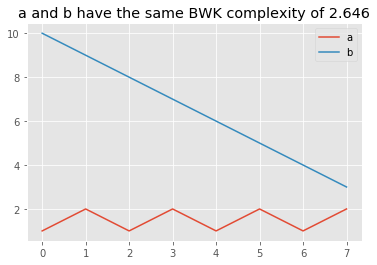

In [122]:
%matplotlib inline
plt.plot(a,label='a')
plt.plot(b,label='b')
plt.legend()
plt.title("a and b have the same BWK complexity of 2.646")

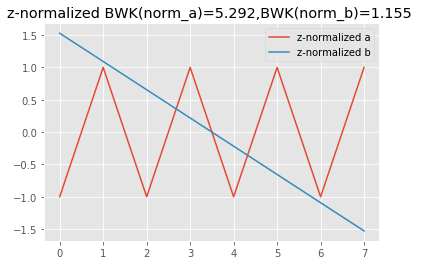

In [123]:
plt.plot(an,label='z-normalized a')
plt.plot(bn,label='z-normalized b')
plt.legend()
plt.title("z-normalized BWK(norm_a)=5.292,BWK(norm_b)=1.155 ")

In [127]:
import re
from collections import defaultdict
splitter='++++++++++++++++++++++++++++++++++++++\n'
f=open('train_data_BWK/classification_log_BWK.txt','r').read().split(splitter)
total_dict=defaultdict(list)

In [130]:
total_dict['merged'].append({'3cl':'0.48/0.48'})

In [132]:
total_dict['merged']

[{'3cl': '0.48/0.48'}]

In [137]:
print '2C1 & 2C2 & 3C & ' *5 + '\\\\'

2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & \\


In [140]:
a='2C1 & 2C2 & 3C & ' *5 
header=a[:-2]+ '\\\\'

In [141]:
header

'2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C & 2C1 & 2C2 & 3C \\\\'

# develop rank refinement code

In [147]:
from ngram_motifs_modules import *
class NgramData:
    def __init__(self,mk_path,N,comp_len,par,X,file_prefix,data_file,csv_file,gt_file,total_num_motifs,num_run):
        self.mk_path=mk_path
        self.N=N
        self.comp_len=comp_len
        self.par=par
        self.X=X
        self.file_prefix=file_prefix
        self.data_file=data_file
        self.csv_file=csv_file
        self.gt_file=gt_file
        self.total_num_motifs=total_num_motifs
        self.num_run=num_run

In [145]:
data=NgramData('mk_txt/',2,200,'56',2,'downsample_syl_2_meta_200_MK','mk_txt/downsample_syl_2_meta_200_MK.txt','csv_version/downsample_syl_2_meta_200.csv',"bigram200p_gtruth.p",200,1)

In [151]:
data=NgramData('mk_txt/',3,300,'2115404940',2,'downsample_syl_3_meta_300_MK','mk_txt/downsample_syl_3_meta_300_MK.txt','csv_version/downsample_syl_3_meta_300.csv',"trigram300p_gtruth.p",38,1)

In [158]:
def get_distinct_motifs(par,X,path,file_prefix,comp_len,k=200):
    """get number of distinct motif cluster files"""
    for i in range(1,k):
        
        si_this=str(i)
        si_next=str(i+1)
        this_file=path+file_prefix+'_txt_%s_%s_%s.0_%s.txt'%(par,comp_len,X,si_this)
        next_file=path+file_prefix+'_txt_%s_%s_%s.0_%s.txt'%(par,comp_len,X,si_next)
        #print this_file
        this_inds=inspect_motif(this_file)
        next_inds=inspect_motif(next_file)
        if this_inds==next_inds:
            return i
    return -1

In [159]:
get_distinct_motifs(data.par,data.X,data.mk_path,data.file_prefix,data.comp_len)

40